# 경찰청 범죄 발생 지역별 통계 데이터를 이용, K-means알고리즘
* (https://www.data.go.kr/data/3074462/fileData.do) 공공데이터에서 이 링크에 있는 데이터를 사용
* python 3.10.13 사용
* 한글 깨짐으로 인해, CSV UTF-8로 재저장 후 데이터 사용, 그래프에서 한글 글꼴 지원을 안해 ttf 글꼴 파일 사용
***

In [1]:
import pandas as pd
# import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.font_manager as fm
import warnings
from sklearn import metrics
import seaborn as sns


In [2]:
# 데이터 불러오기
df = pd.read_csv('경찰청_범죄 발생 지역별 통계.csv')
df.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,1,2,1,2,5,0,1,3,4,19
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,2,0,3,1,11,1,4,4,1,43
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,1,1,0,0,12,5,1,4,1,28
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,6,12,36,41,77,19,17,78,18,375
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,0,2,3,2,14,4,8,13,3,52


In [3]:
# 데이터 df 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄대분류   38 non-null     object
 1   범죄중분류   38 non-null     object
 2   서울      38 non-null     int64 
 3   부산      38 non-null     int64 
 4   대구      38 non-null     int64 
 5   인천      38 non-null     int64 
 6   광주      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   울산      38 non-null     int64 
 9   세종      38 non-null     int64 
 10  경기 고양   38 non-null     int64 
 11  경기 과천   38 non-null     int64 
 12  경기 광명   38 non-null     int64 
 13  경기 광주   38 non-null     int64 
 14  경기 구리   38 non-null     int64 
 15  경기 군포   38 non-null     int64 
 16  경기 김포   38 non-null     int64 
 17  경기 남양주  38 non-null     int64 
 18  경기 동두천  38 non-null     int64 
 19  경기 부천   38 non-null     int64 
 20  경기 성남   38 non-null     int64 
 21  경기 수원   38 non-null     int64 
 22  경기 시흥   38 non-null     int6

In [4]:
# 컬럼별 결측값 개수 확인하기
# 모두 0인지 확인
df.isnull().sum()

범죄대분류     0
범죄중분류     0
서울        0
부산        0
대구        0
         ..
경남 통영     0
제주 서귀포    0
제주 제주     0
기타도시      0
도시이외      0
Length: 89, dtype: int64

In [5]:
# 결측치가 있는 열을 제거
df.dropna(axis=1, inplace=True)

In [6]:
# 데이터 프레임의 데이터 요약 보기
df.describe()

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7046.789474,2949.473684,1748.447368,2233.894737,1010.736842,1136.842105,720.657895,171.710526,634.894737,41.736842,...,70.473684,83.289474,232.131579,269.184211,744.131579,184.394737,197.921053,506.210526,1058.026316,2490.394737
std,13645.657137,6294.945693,3648.593092,4472.827782,2107.371768,2466.304288,1489.014063,363.722415,1270.008061,89.142669,...,146.113384,179.245100,487.780532,593.787971,1614.398326,564.647297,421.577628,1040.641231,4238.854304,5570.407271
min,25.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,131.500000,48.750000,28.000000,43.750000,10.250000,21.500000,11.000000,3.000000,11.500000,0.000000,...,1.000000,1.000000,3.000000,4.250000,12.500000,2.500000,4.000000,13.750000,5.750000,45.250000
50%,863.000000,310.000000,163.500000,289.500000,110.500000,103.000000,71.500000,23.000000,63.000000,7.000000,...,7.500000,9.500000,25.000000,24.000000,70.500000,17.000000,12.500000,46.500000,40.000000,355.000000
75%,4333.500000,2259.000000,1077.000000,1483.000000,540.500000,698.500000,436.000000,110.750000,404.250000,21.750000,...,52.250000,53.250000,137.250000,123.250000,371.000000,66.500000,102.750000,317.250000,163.000000,1258.750000
max,52034.000000,26847.000000,14836.000000,17865.000000,8249.000000,11734.000000,5754.000000,1528.000000,5201.000000,386.000000,...,574.000000,751.000000,2055.000000,2583.000000,7204.000000,3261.000000,1599.000000,3996.000000,25191.000000,23631.000000


In [7]:
# 필요한 데이터만 추출, 범죄대분류 중 강력범죄에 대한 데이터 및 수도권(서울, 부산, 대구, 인천, 광주, 대전, 울산, 세종)지역 데이터 추출
# 수도권 및 광역시만 추출
df = df.fillna(0)
df = df[(df['범죄대분류'] == '강력범죄') ]
df1 = df[['범죄중분류','서울','부산','대구','인천','광주','대전','울산','세종']]
df1.head()

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종
0,살인기수,35,29,16,14,1,6,8,2
1,살인미수등,68,24,15,38,2,11,7,3
2,강도,118,43,31,30,10,17,10,2
3,강간,1200,347,215,340,152,200,112,26
4,유사강간,219,83,43,61,32,34,14,6


Text(0.5, 1.0, '범죄중분류')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


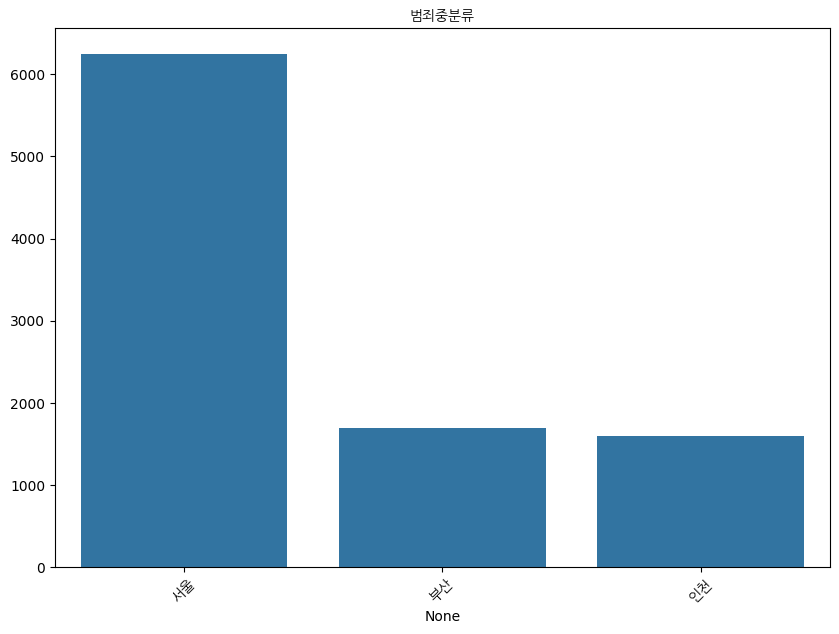

In [8]:

# 나눔고딕 폰트 설정
Gothic = './NanumGothic.ttf'
plt.rcParams['font.family'] = fm.FontProperties(fname=Gothic).get_name()

# 범죄 중분류중 제일 많은 3가지를 선택하여 갯수들을 그래프화 한다

# 경고 메시지 무시하기
warnings.filterwarnings("ignore", message="findfont: Font family 'NanumGothic' not found.")

crime_totals = df1.drop(columns='범죄중분류').sum()

# 상위 3개 범주 선택
top = crime_totals.nlargest(3)

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45,fontproperties=fm.FontProperties(fname=Gothic)) # 한글 폰트 지정을 위해 fontproperties=fm.FontProperties(fname=font_path)를 추가한다
plt.title('범죄중분류',fontproperties=fm.FontProperties(fname=Gothic))

In [9]:
# 데이터 subplot 전 내용 확인
df1.head()

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종
0,살인기수,35,29,16,14,1,6,8,2
1,살인미수등,68,24,15,38,2,11,7,3
2,강도,118,43,31,30,10,17,10,2
3,강간,1200,347,215,340,152,200,112,26
4,유사강간,219,83,43,61,32,34,14,6


In [10]:
# 데이터 프레임의 데이터 요약 보기
df1.describe()

,서울,부산,대구,인천,광주,대전,울산,세종
count,8.00000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,781.25000,211.62500,128.375000,199.875000,78.875000,101.250000,62.500000,15.125000
std,1495.96598,361.04924,220.441076,352.200607,135.558567,173.696575,106.441131,24.764246
min,35.00000,14.00000,9.000000,14.000000,1.000000,2.000000,7.000000,1.000000
25%,59.75000,27.75000,15.750000,26.500000,6.500000,9.750000,9.500000,2.000000
50%,167.50000,63.00000,37.000000,49.500000,21.000000,25.500000,12.000000,4.500000
75%,464.25000,153.50000,91.250000,137.500000,64.250000,80.000000,49.000000,12.500000
max,4358.00000,1064.00000,648.000000,1030.000000,391.000000,500.000000,311.000000,73.000000


Text(0.5, 0, '세종')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

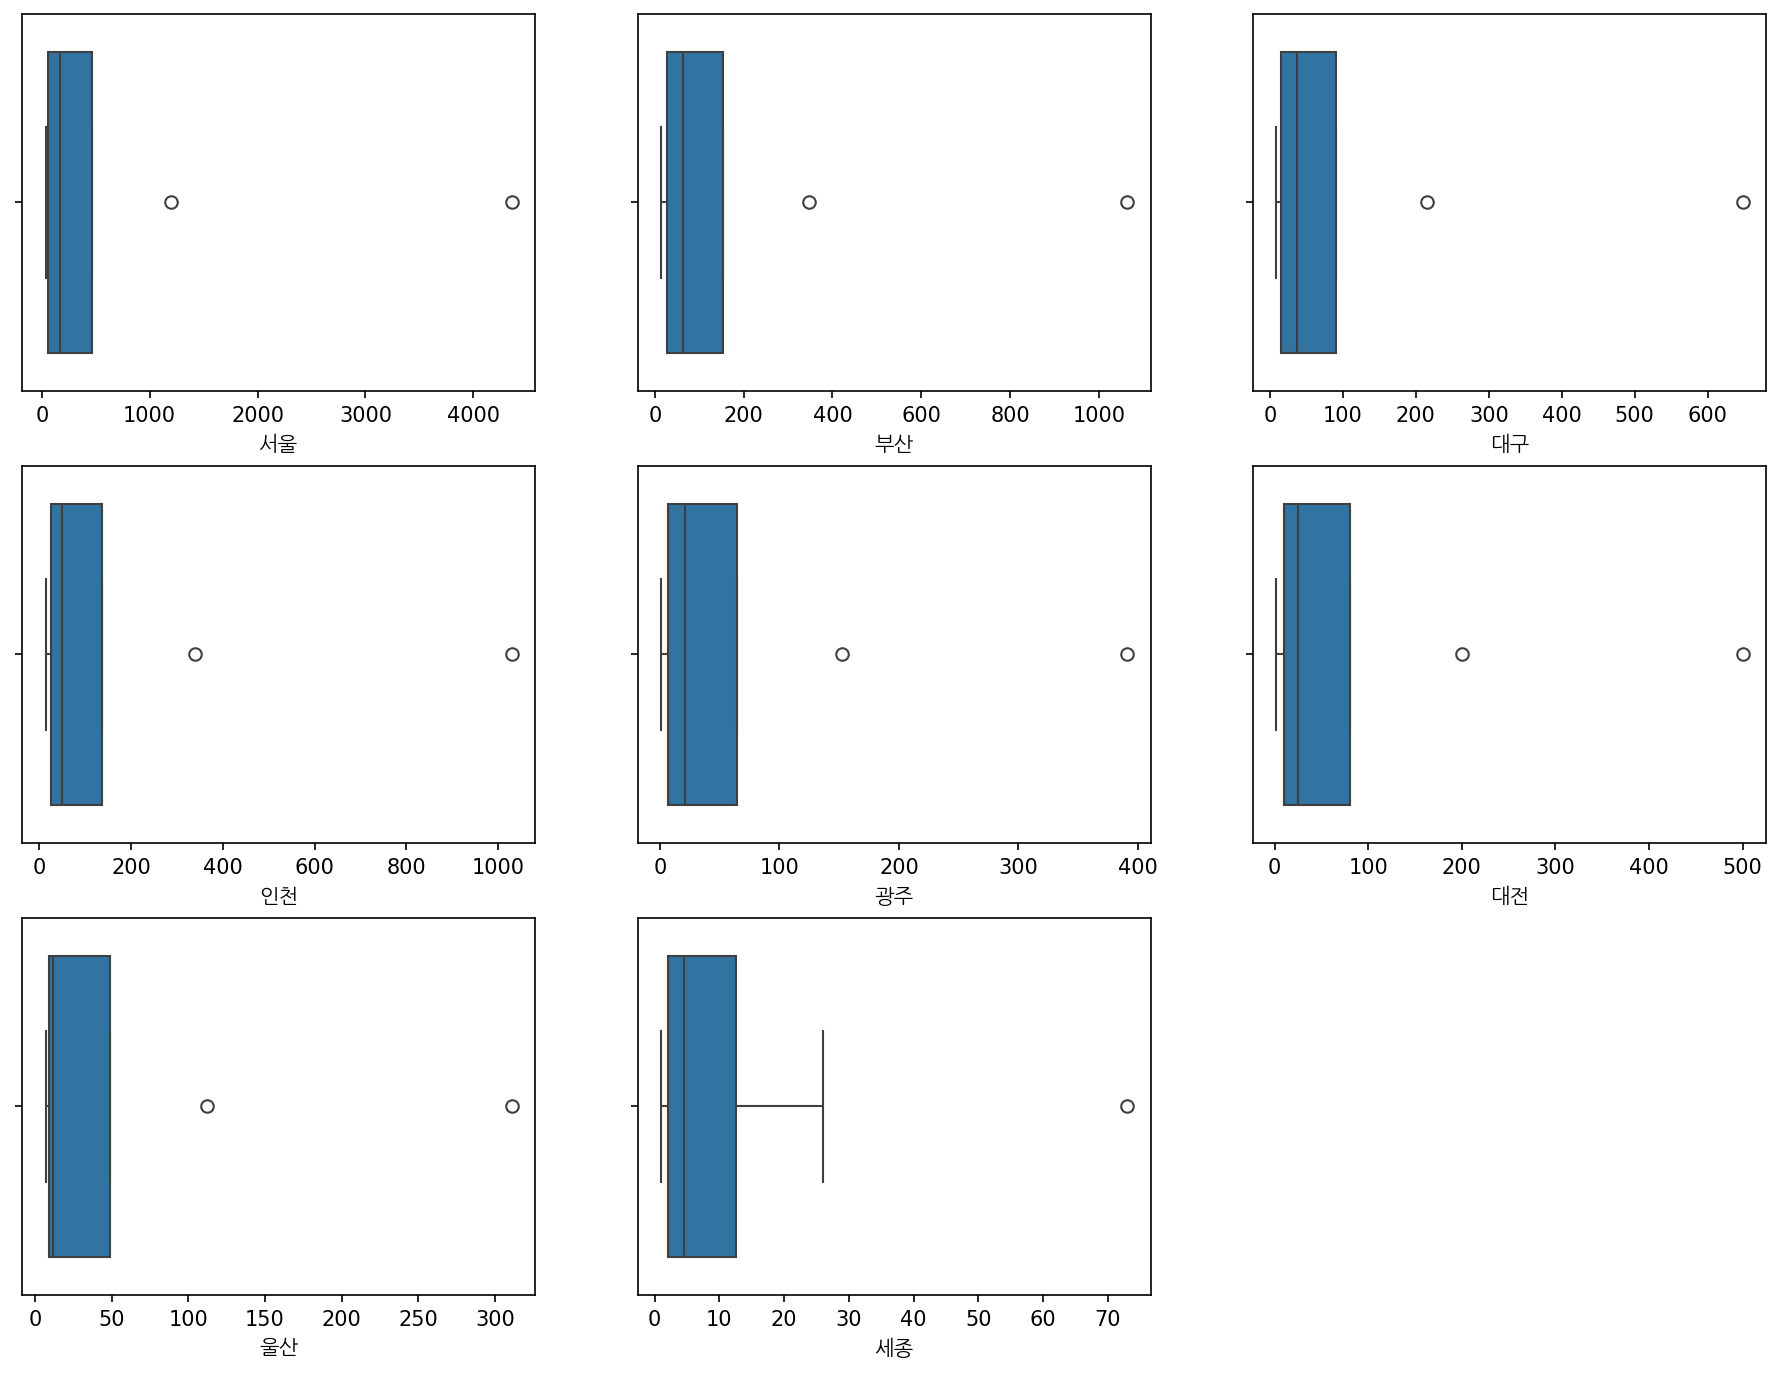

In [11]:
# 지역마다 boxplot 하기
plt.figure(figsize=(15,15), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x='서울', data=df1)
plt.xlabel('서울', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,2)
sns.boxplot(x='부산', data=df1)
plt.xlabel('부산', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,3)
sns.boxplot(x='대구', data=df1)
plt.xlabel('대구', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,4)
sns.boxplot(x='인천', data=df1)
plt.xlabel('인천', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,5)
sns.boxplot(x='광주', data=df1)
plt.xlabel('광주', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,6)
sns.boxplot(x='대전', data=df1)
plt.xlabel('대전', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,7)
sns.boxplot(x='울산', data=df1)
plt.xlabel('울산', fontproperties=fm.FontProperties(fname=Gothic))
plt.subplot(4,3,8)
sns.boxplot(x='세종', data=df1)
plt.xlabel('세종', fontproperties=fm.FontProperties(fname=Gothic))

In [12]:
la = LabelEncoder()
X = df.loc[:, ('범죄중분류','부산','대구','인천','광주','대전')]
y = df['범죄중분류']
X['범죄중분류'] = la.fit_transform(X['범죄중분류'])
y = la.transform(y)

In [13]:
# k- means 알고리즘 사용
# 데이터를 예상해본다
# 0이면 살인기수 1이면 살인미수등 2이면 강도로 예상된 것이다
nclusters = 3 
seed = 0
k = KMeans(n_clusters=nclusters, random_state=seed)
k.fit(X)

y_cluster_kmeans = k.predict(X)
y_cluster_kmeans


array([0, 0, 0, 2, 0, 1, 0, 0], dtype=int32)

In [15]:
# 실루엣 점수를 평가
score = metrics.silhouette_score(X, y_cluster_kmeans)
score
# 일한 군집 내에서의 데이터는 서로 가깝게 위치해있으며 다른 군집과의 거리는 멀음을 의미
# 값이 클수록 군집화의 성능이 좋다는 것을 의미

0.6628079420649566

In [31]:
from sklearn.cluster import KMeans
# 1부터 5까지 최적의 클러스터 찾기
sse = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

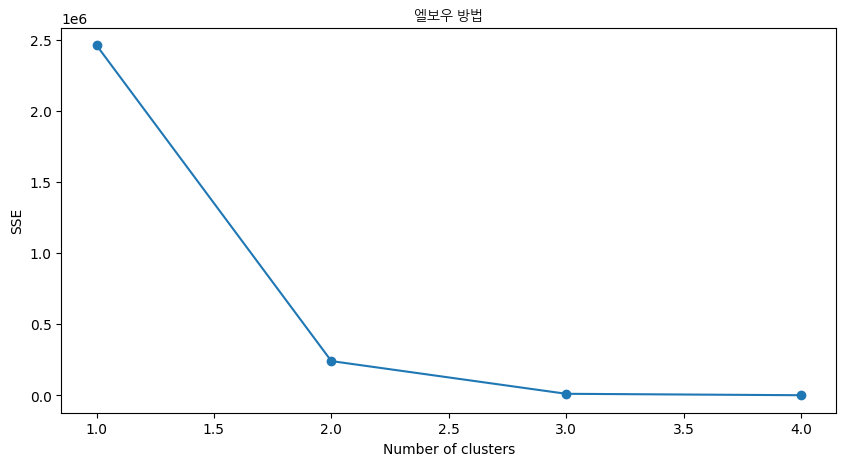

In [32]:
# SSE 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(range(1, 5), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('엘보우 방법', fontproperties=fm.FontProperties(fname=Gothic))
plt.show()

위 그래프에서 엘보우 지점 2-3

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

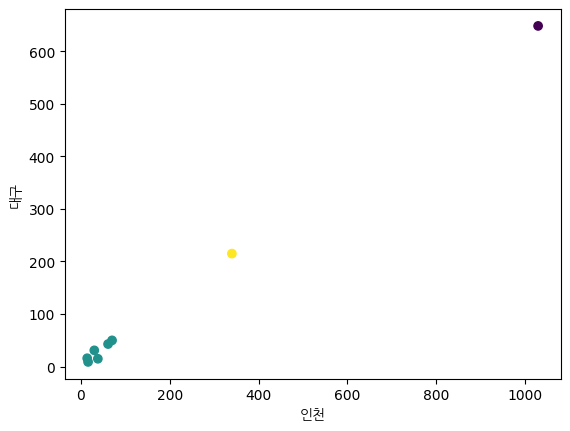

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['인천'],df['대구'],c = labels)
plt.xlabel('인천',fontproperties=fm.FontProperties(fname=Gothic))
plt.ylabel('대구',fontproperties=fm.FontProperties(fname=Gothic))
plt.show()

In [41]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("결과: %d 개의 샘플 중 %d 개의 샘플에 정확하게 부착." % (correct_labels, y.size))

print('정확도: {0:0.2f}'. format(correct_labels/float(y.size)))

결과: 1 개의 샘플 중 8 개의 샘플에 정확하게 부착.
정확도: 0.12


# 결과
- boxxplot을 하였을 때, 비슷해 보이는 값으로 산점도를 나타냈음에도 불구하고 정확도가 낮은 것을 보여주고 있다.
- 데이터 값에 대한 범위가 넓었다. 1에서부터 1000까지 범위가 넓다.
- 실루엣 점수도 낮고 정확도도 크게 떨어지는 경우가 발생하였다.